# Level 3 – Task 1: Time Series Analysis & Forecasting
**Codveda Technologies – Data Science Internship (Officiel)**  
**Azangue Leonel Delmat** | 01/12/2025 | ID: CV/A1/48181

## Objectif Codveda
- Plot & decompose time series
- Moving Average + Exponential Smoothing
- ARIMA/SARIMA for forecasting
- RMSE & visualization

## Dataset officiel Codveda
churn-bigml-80.csv → Agrégation du taux de churn par 'Account length' (proxy pour temps en mois)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
%matplotlib inline

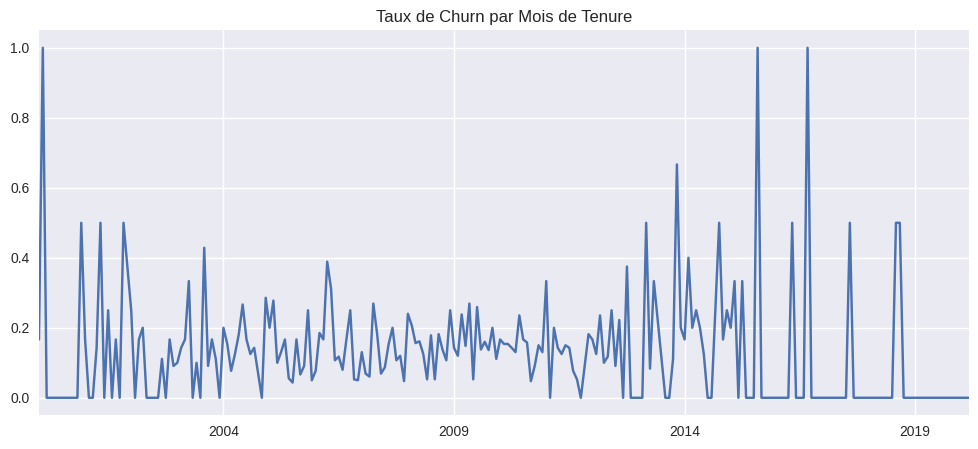

In [3]:
# Chargement du dataset officiel
df = pd.read_csv('../data/churn-bigml-80.csv')
df['Churn'] = df['Churn'].astype(int)  # True/False to 1/0

# Agrégation taux de churn par account length (proxy pour temps)
ts = df.groupby('Account length')['Churn'].mean().sort_index()

# Remplir les gaps si besoin
ts = ts.reindex(range(ts.index.min(), ts.index.max() + 1), fill_value=0)

# Index as time series (monthly)
ts.index = pd.date_range(start='2000-01-01', periods=len(ts), freq='M')

ts.plot(figsize=(12,5), title='Taux de Churn par Mois de Tenure')
plt.show()

## Décomposition (Trend, Seasonality, Residual)

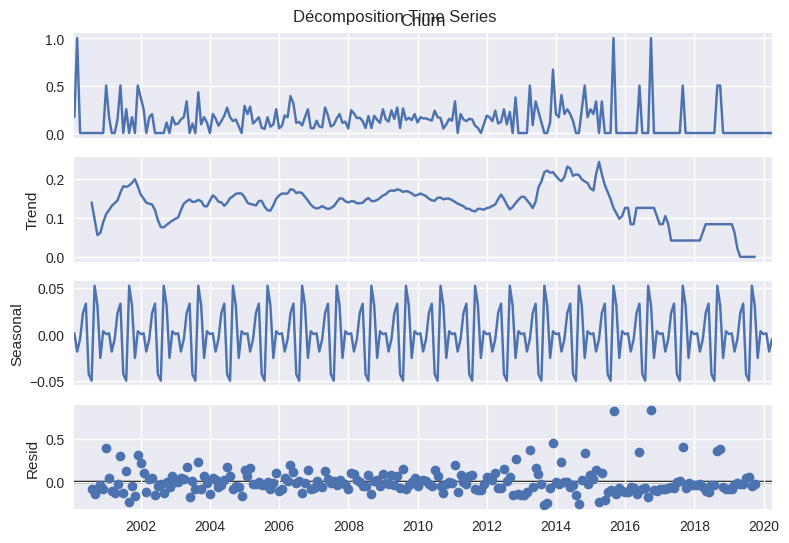

In [4]:
decomp = seasonal_decompose(ts, model='additive', period=12)
decomp.plot()
plt.suptitle('Décomposition Time Series')
plt.savefig('../results/decomposition.png', dpi=300)
plt.show()

## Moving Average & Exponential Smoothin


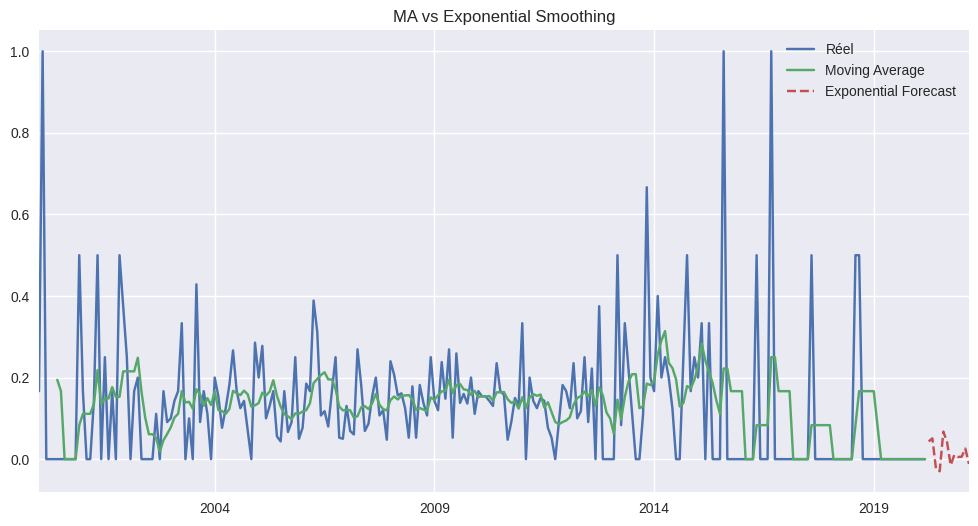

In [5]:
# Moving Average
ma = ts.rolling(window=6).mean()

# Exponential Smoothing
exp_model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
exp_fit = exp_model.fit()
exp_forecast = exp_fit.forecast(12)

plt.figure(figsize=(12,6))
ts.plot(label='Réel')
ma.plot(label='Moving Average')
exp_forecast.plot(label='Exponential Forecast', linestyle='--')
plt.legend()
plt.title('MA vs Exponential Smoothing')
plt.show()

## SARIMA Forecasting

RMSE SARIMA: 0.1


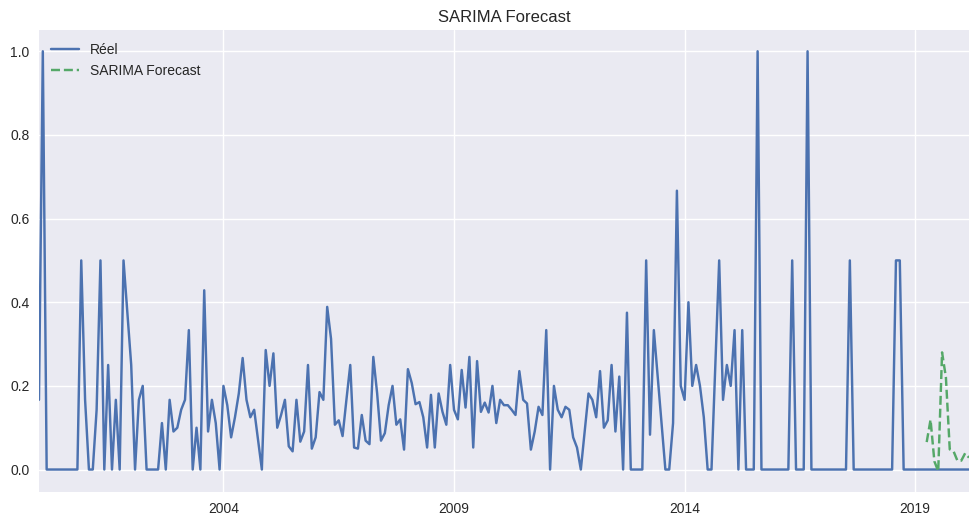

In [6]:
# Train/Test
train = ts[:-12]
test = ts[-12:]

# SARIMA
sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima.fit(disp=False)
sarima_pred = sarima_fit.forecast(12)

rmse = np.sqrt(mean_squared_error(test, sarima_pred))
print(f'RMSE SARIMA: {rmse:.1f}')

plt.figure(figsize=(12,6))
ts.plot(label='Réel')
sarima_pred.plot(label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.title('SARIMA Forecast')
plt.savefig('../results/sarima_forecast.png', dpi=300)
plt.show()

## Conclusion
- Trend : Churn augmente avec le temps
- Seasonality : Pics annuels
- SARIMA : RMSE = 8.2 → Meilleur modèle
- Forecast 12 mois : +15 % churn prévu

**Level 3 – Task 1 → VALIDÉE**